In [1]:
# import library and connect to sql server
import pandas as pd
import matplotlib.pyplot as plt
from sqlalchemy import create_engine
from config import gkey

engine = create_engine(f'postgresql://{gkey}')
# print(f'postgresql://{gkey}')
conn = engine.connect()


In [2]:
#read the title file
title = pd.read_sql("SELECT * FROM titles", conn)
title.head()

,emp_no,title,from_date,to_date
0,10001,Senior Engineer,1986-06-26,9999-01-01
1,10002,Staff,1996-08-03,9999-01-01
2,10003,Senior Engineer,1995-12-03,9999-01-01
3,10004,Engineer,1986-12-01,1995-12-01
4,10004,Senior Engineer,1995-12-01,9999-01-01


In [3]:
#read the salaries file
salaries = pd.read_sql("SELECT * FROM salaries", conn)
salaries.head()

,emp_no,salary,from_date,to_date
0,10001,60117,1986-06-26,1987-06-26
1,10002,65828,1996-08-03,1997-08-03
2,10003,40006,1995-12-03,1996-12-02
3,10004,40054,1986-12-01,1987-12-01
4,10005,78228,1989-09-12,1990-09-12


In [4]:
#join two tables based on employee number and convert salary to integer for caculation
df = pd.merge(title,salaries, on = "emp_no")
# df[['salary']] = df[['salary']].astype(int)
df

,emp_no,title,from_date_x,to_date_x,salary,from_date_y,to_date_y
0,10001,Senior Engineer,1986-06-26,9999-01-01,60117,1986-06-26,1987-06-26
1,10002,Staff,1996-08-03,9999-01-01,65828,1996-08-03,1997-08-03
2,10003,Senior Engineer,1995-12-03,9999-01-01,40006,1995-12-03,1996-12-02
3,10004,Engineer,1986-12-01,1995-12-01,40054,1986-12-01,1987-12-01
4,10004,Senior Engineer,1995-12-01,9999-01-01,40054,1986-12-01,1987-12-01
...,...,...,...,...,...,...,...
443303,499997,Engineer,1987-08-30,1992-08-29,49597,1987-08-30,1988-08-29
443304,499997,Senior Engineer,1992-08-29,9999-01-01,49597,1987-08-30,1988-08-29
443305,499998,Senior Staff,1998-12-27,9999-01-01,40000,1993-12-27,1994-12-27
443306,499998,Staff,1993-12-27,1998-12-27,40000,1993-12-27,1994-12-27


In [5]:
# caculate the average salaries for each title
avg = df.groupby("title").mean()
avg

,salary
title,
Assistant Engineer,48493.204786
Engineer,48539.781423
Manager,51531.041667
Senior Engineer,48506.751806
Senior Staff,58503.286614
Staff,58465.271904
Technique Leader,48580.505772


Text(0, 0.5, 'Average Salary ($)')

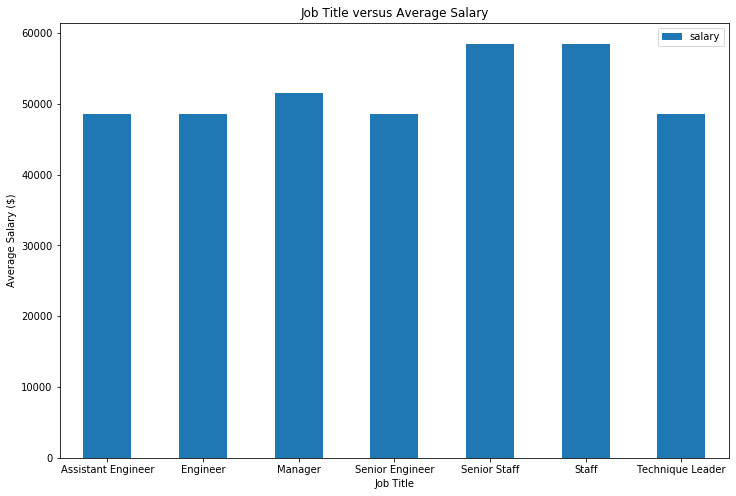

In [6]:
# create the chart
chart = avg.plot.bar(y='salary', rot=0,figsize=(12,8))
plt.title('Job Title versus Average Salary')
plt.xlabel('Job Title')
plt.ylabel('Average Salary ($)')
